In [231]:
import pandas as pd

ad=pd.read_csv("Advertising.csv")
df=ad.copy()
df=df.iloc[:,1:len(df)] #indeksi değişken olarak gördüğü için  değiştirdik

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [234]:
df.isnull().values.any() #return false o sebeple null değer yok demek

False

In [235]:
df.corr() #Buradaki correlationu inceleyince TV ve sales arasında 0.7822 şeklinde bir ilişki göreceksin,bu yaklaşık %80 civarına denk geliyor,kuvvetli pozitif bir ilişki,yani TV harcamaları arttıkça satışlar da artacak demek 
#Diğerlerine de kısaca göz gezdirebilirsin
#Şuan hiçbir model kurmadan bu üç değişkeni modellesem ve Sales değişkenini bağımlı değişken kabul etsem en anlanmı ve ilişki düzeyi en yüksek değişken TV değişkeni çıkacaktır

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


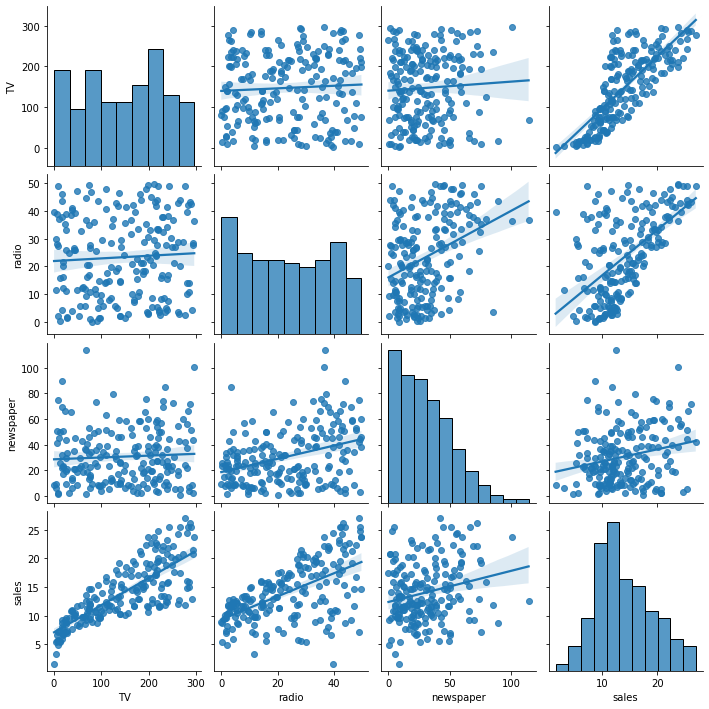

In [236]:
import seaborn as sns
sns.pairplot(df,kind="reg") #burada sales-TV  sales-Radio arasindaki ilişkiye odaklan ve buradaki eğimler şiddeti ifade eder eğim pozitif ve yüksekse küvevetli bir ilişki vardır

In [237]:
X=df[["TV"]]
X[0:5]


,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


**Stats Model İle Modelleme**

In [238]:
import statsmodels.api as sm #sciketlearn learn yerine statsmodels.api import etme sebebimiz:bunun çok daha fazla istatistiksel donanımı olması 
#bunla sciketlearn bir değil
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [239]:
X=sm.add_constant(X) #Elimizde tek değişkenden oluşan TV matrisi var matris işlemleri gerçekleştirmek için bunu yapıyoruz,çok teknik detaya gerek yok


c:\users\erkan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [240]:
X[0:5] #Artık bağımsız değişkenimiz hazır

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [241]:
y=df["sales"]

In [242]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [243]:
lm=sm.OLS(y,X) #lm =linear model OOP anlamında intialize işlemi gerçekleştirdik

In [301]:
model=lm.fit()

In [245]:
model.summary() #R-squared:açıklanabilirlik oranıdır
                #Adj. R-squared:düzeltilmiş R2 değeri daha düzgün bir değerdir
                #Adj. R-squared:	0.610 modelin %60 ını açıklayabiliyor demek
                #F-statistic:	 modelin anlamlılık değeri
            

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           1.47e-42
Time:                        10:00:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
model.params #buradaki const hiçbir TV satılmazsa kazanılacak sales
             #TV ise 1 birim TV satışının sales e katkısı,yani 1 tane TV satılınca ne kadar kazanç elde edilecek


const    7.032594
TV       0.047537
dtype: float64

In [247]:
model.summary().tables[1] #model.summary().tables ile yukarıda görmüş olduğun büyük table'ı 3 parçaya bölüp listeye alıyor

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [248]:
model.f_pvalue

1.467389700194647e-42

In [249]:
print(f"{model.f_pvalue:.3f}")

0.000


In [250]:
model.fvalue #f istatistiği

312.144994372713

In [251]:
print(f"{model.fvalue:.3f}")

312.145


In [252]:
model.mse_model #burada çıkacak olan değer modelimizin başarısı korkunç bir değer 

3314.618166868649

In [253]:
model.rsquared_adj #buradan çıkacak değer gerçek hayat için uygun bir değer

0.6099148238341623

In [302]:
model.fittedvalues[:5] #bunlar modelimizin tahmin ettiği değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [255]:
y[:5] #gerçek değerlerimiz

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

**Modelimizin arka planda ürettiği denkleme bir göz atalım**

In [256]:
print("Sales = "+f"{model.params[0]:.3}"+"+ TV*"+f"{model.params[1]:.1}" )

Sales = 7.03+ TV*0.05


Text(0, 0.5, 'Satış Sayısı')

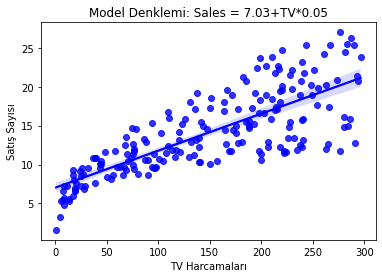

In [257]:
a=sns.regplot(x=df["TV"],y=df["sales"],color="b",scatter=9)
a.set_title("Model Denklemi: Sales = 7.03+TV*0.05")
a.set_xlabel("TV Harcamaları")
a.set_ylabel("Satış Sayısı")

**SCIKITLEARN Makine Öğrenmesi Algoritmalarını Kullanacağımız Güzel Bir frameworkdür,(sadece linear regression için mi geçerli bilmiyorum ama) import statsmodels.api as sm yerini tutmaz ama Hemen hemen bütün makine öğrenmesi algoritmalarını kapsar**

In [294]:
from sklearn.linear_model import LinearRegression

In [303]:
X=df[["TV"]]
y=df["sales"]
reg=LinearRegression() #object üretiyoruz
model=reg.fit(X,y)
model.intercept_

7.032593549127695

In [296]:
model.coef_ #b1 katsaysını almış olduk y=b0+b1x deki b1

array([0.04753664])

In [261]:
model.score(X,y)#bu score başarı tahmini değil R2 değeri

0.611875050850071

In [262]:
model.predict(X)[:10] #tahmin edilen değerler

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [263]:
model.predict([[30]]) #Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

array([8.45869276])

In [264]:
yeni_veri=[[5],[90],[200]]

In [265]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

In [266]:
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.formula.api as smf

In [304]:
X=df[["TV"]]
X=sm.add_constant(X)
y=df["sales"]
lm=sm.OLS(y,X) #lm =linear model OOP anlamında intialize işlemi gerçekleştirdik
model=lm.fit()
mse=mean_squared_error(y,model.fittedvalues)
mse

c:\users\erkan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


10.512652915656757

In [268]:
mse #hata kareleri ortalama değeri

10.512652915656757

In [269]:
import numpy as np
rmse=np.sqrt(mse)

In [270]:
rmse

3.2423221486546887

In [275]:
reg.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [276]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [279]:
k_t=pd.DataFrame({"gercek_y":y[:10],
                   "tahmin_y":reg.predict(X)[:10]})

In [280]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [281]:
k_t["hata"]=k_t["gercek_y"]-k_t["tahmin_y"]

In [282]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [286]:
k_t["hata_kare"]=k_t["hata"]**2 #hata kareleri

In [287]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [314]:
np.sum(k_t["hata_kare"])

92.90350329638102

In [288]:
np.mean(k_t["hata_kare"])#hata kare ortalaması

9.290350329638102

In [291]:
np.sqrt(np.mean(k_t["hata_kare"])) #hata kare ortalaması karekökü

3.048007599996775

In [309]:
model.resid[:10] #bu da bizim yukarıda elle bulmuş olduğumuz hataların(artıklarınİ) otomatik bulunmuş hali 


0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

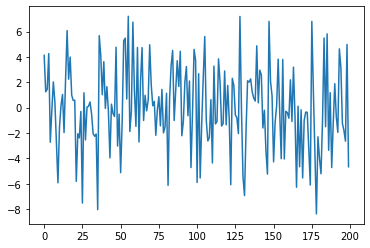

In [313]:
import matplotlib.pyplot as plt
plt.plot(model.resid) #mesela burada 8-7 civarına bir bakmak lazım sebebini anlamak lazım